# Snelheid voertuig uit positie berekenen


In [2]:
import csv
import matplotlib.pyplot as plt

class Vehicle:
    """
    This is a class
    """
    def __init__(self, col_num, last_pos):
        self.last_position = float(last_pos)
        self.col_id = int(col_num)
        self.max_velocity = 0.0
        self.min_velocity = 100.0
        self.velocity_list = []
        
        
    def set_max_velocity(self, velo):
        """Compares the given value with the current velocity and takes the greatest velocity"""
        if velo > self.max_velocity:
            self.max_velocity = velo
        
    def get_max_velocity(self):
        """Returns the max velocity"""
        return self.max_velocity
    
    def set_min_velocity(self, velo):
        """"""
        if velo < self.min_velocity:
            self.min_velocity = velo
    
    def get_min_velocity(self):
        """"""
        return self.min_velocity
    
    def set_velocity_list(self, pos):
        """"""
        # 
        new_velocity = abs((pos - self.last_position)/0.1)
        # print(new_velocity)
        self.velocity_list.append(new_velocity)
        self.last_position = pos
        
        # 
        self.set_max_velocity(new_velocity)
        self.set_min_velocity(new_velocity)
        
    def get_velocity_list(self):
        """"""
        return self.velocity_list


asdf


In [3]:
file_name = "verkeerssimulatie-rechteweg-posities.csv"

with open(file_name, "r") as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=';')
    
    # asdf
    vehicle_list = []
    is_first_row = True
    
    # Iterate over every row in the csv file
    for row in csv_reader:
        # 
        if is_first_row:
            # 
            for car in range(1, len(row)):
                
                # 
                vehicle_list.append(Vehicle(car, row[car]))
            is_first_row = False
        else:
            for car in vehicle_list:
                position = float(row[car.col_id])
                car.set_velocity_list(position)
    
# 
for car in vehicle_list:
    print("Vehicle: {0}\nMax velocity: {1}\nMin velocity: {2}\n".format(
        car.col_id, car.get_max_velocity(), car.get_min_velocity()
    ))


Vehicle: 1
Max velocity: 6.3500000000004775
Min velocity: 1.269999999999527

Vehicle: 2
Max velocity: 2.0000000000000284
Min velocity: 0.0



plotting the data


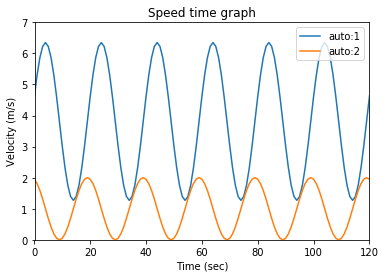

In [4]:
# getting the highest total velocity for plotting the limit
max_y = 0.0
min_y = 100.0
for car in vehicle_list:
    if car.get_max_velocity() > max_y:
        max_y = car.get_max_velocity()
    if car.get_min_velocity() < min_y:
        min_y = car.get_min_velocity()

# initializing the axes limits
plt.xlim(0.1, 120.0)
plt.ylim(int(min_y), int(max_y) + 1)

# labeling plots
plt.title("Speed time graph")
plt.xlabel("Time (sec)")
plt.ylabel("Velocity (m/s)")

for car in vehicle_list:
    plt.plot(car.get_velocity_list(), label='auto:{0}'.format(car.col_id))
plt.legend(loc='upper right')